<a href="https://colab.research.google.com/github/emanuelmad/Data_Science_projects/blob/main/Panorama_do_COVID_19_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evolução da COVID-19

<center><img alt="Colaboratory logo" width="80%" src="https://t3.ftcdn.net/jpg/03/99/51/52/240_F_399515242_8CIlpYY6vlSvYkLpNPDGL8IxGFFleNpd.jpg"</center>

## Obtenção dos Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19

* Você deve entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este meu link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv) (atualizado até 05 de julho de 2021).
* *Importe os dados do `csv` para a variável `df`.*
    * *`pd.read_csv("endereco_do_arquivo.csv")`*

In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ajusta o estilo do gráficos
sns.set_style()
%matplotlib inline

# Retirar os avisos de erro
import warnings
warnings.filterwarnings('ignore')


# importar o dataset COVID-19 para um DataFrame

df = pd.read_csv ("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

Parte importante da nossa análise, é descobrir o tamanho do dataset que estamos encarando.

 Vamos verificar:

In [3]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

df.head()

Dimensões do Dataset 
Variáveis:  60 
Entradas:  100920


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
# Extrair nome das colunas

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Outro detalhe importante que precisamos verificar e garantir que estão da forma que precisamos é o tipo das variáveis. Para isso, utilizaremos o método `dtypes`.

In [5]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Outro detalhe importante é a verificação em relação aos dados ausentes. Lembre-se de se atentar não para **quais** dados estão faltando, mas também o **motivo** deles estarem faltando.

Para isso, é importante verificar a fonte dos dados, entender a coleta deles, verificar a aleatoriedade dessa ausência, etc.

In [6]:
# Verificar no df celulas vazias

round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

weekly_icu_admissions                    0.99
weekly_icu_admissions_per_million        0.99
weekly_hosp_admissions                   0.98
weekly_hosp_admissions_per_million       0.98
excess_mortality                         0.96
icu_patients                             0.90
icu_patients_per_million                 0.90
hosp_patients                            0.88
hosp_patients_per_million                0.88
people_fully_vaccinated_per_hundred      0.87
people_fully_vaccinated                  0.87
new_vaccinations                         0.86
people_vaccinated                        0.84
people_vaccinated_per_hundred            0.84
total_vaccinations_per_hundred           0.83
total_vaccinations                       0.83
new_vaccinations_smoothed_per_million    0.70
new_vaccinations_smoothed                0.70
total_tests                              0.56
total_tests_per_thousand                 0.56
new_tests_per_thousand                   0.55
new_tests                         

Como vimos ao analisar o tipo das variáveis, verificamos que a coluna `date` não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [7]:
# transformando a coluna data em datetime

df.date = pd.to_datetime(df.date)

Após alterar o formato, vamos verificar qual a data mais recente do nosso dataset. Com essa informação, vamos verificar o país líder em casos naquele momento.

In [8]:
# data mais recente do dataset
df.date.max()

Timestamp('2021-07-07 00:00:00')

In [9]:
# Total de casos

df.loc[df.date == '2021-07-04'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
99510,OWID_WRL,NaN,World,2021-07-04,183786486.0,326855.0,384663.571,3977133.0,6389.0,7728.857,23578.093,41.932,49.349,510.229,0.820,0.992,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.229078e+09,1.892803e+09,888878183.0,27773491.0,36875059.0,41.43,24.28,11.40,4731.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
5286,OWID_ASI,NaN,Asia,2021-07-04,56410376.0,142994.0,144318.429,799744.0,2257.0,2311.000,12157.808,30.819,31.104,172.364,0.486,0.498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.005334e+09,1.140025e+09,393067893.0,17948220.0,26820690.0,43.22,24.57,8.47,5781.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30871,OWID_EUR,NaN,Europe,2021-07-04,48538802.0,60331.0,66965.143,1109034.0,744.0,998.714,64832.502,80.583,89.444,1481.319,0.994,1.334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.264780e+08,3.178289e+08,220370059.0,4805159.0,4827867.0,70.32,42.45,29.43,6449.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67224,OWID_NAM,NaN,North America,2021-07-04,39794706.0,13340.0,28426.000,904252.0,175.0,549.000,67212.589,22.531,48.011,1527.266,0.296,0.927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.425885e+08,2.561542e+08,198569123.0,1328786.0,2365041.0,74.75,43.26,33.54,3995.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96167,USA,North America,United States,2021-07-04,33717761.0,3697.0,13191.714,605526.0,33.0,227.857,101865.533,11.169,39.854,1829.369,0.100,0.688,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.306043e+08,1.824128e+08,157323738.0,633702.0,1039561.0,98.85,54.54,47.04,3108.0,33.8,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44933,IMN,Europe,Isle of Man,2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.093540e+05,6.324900e+04,46105.0,329.0,885.0,128.60,74.38,54.22,10408.0,NaN,8.503200e+04,147.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.40,NaN,NaN
54559,MAC,Asia,Macao,2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.679580e+05,2.472780e+05,118169.0,5962.0,6077.0,56.67,38.08,18.20,9359.0,28.7,6.493420e+05,20546.766,39.2,9.798,4.991,104861.851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.24,NaN,NaN
64733,NCL,O

In [10]:
# removendo linhas dos continentes 98793, 5247, 30660, 66749, 1004, 83817, 31189 
df.drop(99510, axis=0, inplace=True)
df.drop(5286, axis=0, inplace=True)
df.drop(30871, axis=0, inplace=True)
df.drop(67224, axis=0, inplace=True)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [14]:
df.drop(1007, axis=0, inplace=True)

In [15]:
# Coloca em ordem os países com mais casos totalizados até o dia 04-07-2021
df.loc[df.date == '2021-07-04'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
96167,USA,North America,United States,2021-07-04,33717761.0,3697.0,13191.714,605526.0,33.0,227.857,101865.533,11.169,39.854,1829.369,0.100,0.688,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330604253.0,182412776.0,157323738.0,633702.0,1039561.0,98.85,54.54,47.04,3108.0,33.80,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
42255,IND,Asia,India,2021-07-04,30585229.0,39796.0,43699.714,402728.0,723.0,856.857,22163.139,28.838,31.666,291.831,0.524,0.621,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1838490.0,418254953.0,303.082,1.332,1998550.0,1.448,0.022,45.7,samples tested,347378550.0,284455266.0,62923284.0,3077960.0,4192591.0,25.17,20.61,4.56,3038.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
13326,BRA,South America,Brazil,2021-07-04,18769808.0,27783.0,49887.143,524417.0,830.0,1563.286,88303.821,130.707,234.697,2467.155,3.905,7.355,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105301611.0,77653882.0,27647729.0,NaN,1213850.0,49.54,36.53,13.01,5711.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
33212,FRA,Europe,France,2021-07-04,5848209.0,2549.0,2319.571,111348.0,9.0,31.143,86557.742,37.727,34.331,1648.031,0.133,0.461,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56578638.0,34555354.0,22603199.0,195639.0,578582.0,83.74,51.14,33.45,8563.0,NaN,6.756425e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
75413,RUS,Europe,Russia,2021-07-04,5544209.0,24693.0,22389.000,135637.0,650.0,652.429,37991.089,169.206,153.418,929.438,4.454,4.471,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,488392.0,152366325.0,1044.074,3.347,483264.0,3.312,0.046,21.6,tests performed,42830589.0,24969023.0,17861566.0,380522.0,627204.0,29.35,17.11,12.24,4298.0,46.76,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44933,IMN,Europe,Isle of Man,2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109354.0,63249.0,46105.0,329.0,885.0,128.60,74.38,54.22,10408.0,NaN,8.503200e+04,147.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.40,NaN,NaN
54559,MAC,Asia,Macao,2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367958.0,247278.0,118169.0,5962.0,6077.0,56.67,38.08,18.20,9359.0,28.70,6.493420e+

Pudemos verificar que os países líderes em casos aos 15 de Junho de 2020 eram:

* Estados Unidos - 33.717.761 casos
* India  - 30.585.229 casos
* Brasil - 18.769.808 casos
* França - 5.848.209 casos
* Russia - 5.544.209 casos

Agora, vamos verificar os casos de morte.

In [16]:
df.loc[df.date == '2021-07-04'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
96167,USA,North America,United States,2021-07-04,33717761.0,3697.0,13191.714,605526.0,33.0,227.857,101865.533,11.169,39.854,1829.369,0.100,0.688,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330604253.0,182412776.0,157323738.0,633702.0,1039561.0,98.85,54.54,47.04,3108.0,33.80,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
13326,BRA,South America,Brazil,2021-07-04,18769808.0,27783.0,49887.143,524417.0,830.0,1563.286,88303.821,130.707,234.697,2467.155,3.905,7.355,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105301611.0,77653882.0,27647729.0,NaN,1213850.0,49.54,36.53,13.01,5711.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
42255,IND,Asia,India,2021-07-04,30585229.0,39796.0,43699.714,402728.0,723.0,856.857,22163.139,28.838,31.666,291.831,0.524,0.621,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1838490.0,418254953.0,303.082,1.332,1998550.0,1.448,0.022,45.7,samples tested,347378550.0,284455266.0,62923284.0,3077960.0,4192591.0,25.17,20.61,4.56,3038.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN
59270,MEX,North America,Mexico,2021-07-04,2540068.0,2611.0,4896.571,233622.0,42.0,151.143,19700.719,20.251,37.978,1811.968,0.326,1.172,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629.0,7145099.0,55.417,0.013,13405.0,0.104,0.299,3.3,people tested,47197494.0,32575554.0,19829015.0,NaN,469215.0,36.61,25.27,15.38,3639.0,44.44,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN
72372,PER,South America,Peru,2021-07-04,2065113.0,7559.0,2722.286,193230.0,543.0,235.143,62632.617,229.256,82.564,5860.454,16.469,7.132,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8123443.0,4759132.0,3364311.0,86374.0,118697.0,24.64,14.43,10.20,3600.0,75.93,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66692,NIU,Oceania,Niue,2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,48208.0,NaN,1.618000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.71,NaN,NaN
77650,WSM,Oceania,Samoa,2021-07-04,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1104.0,NaN,NaN,NaN,5564.0,NaN,1.984100e+05,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,

Em relação às mortes, os países que lideravam no dia 04 de Julho de 2021 eram:

* Estados Unidos - 605.526 mortes
* Brasil - 524.417 mortes
* Índia - 402.728 mortes
* México - 233.622
* Peru - 193.230 mortes

Para melhorar a visualização, vamos plotar um gráfico de barras.

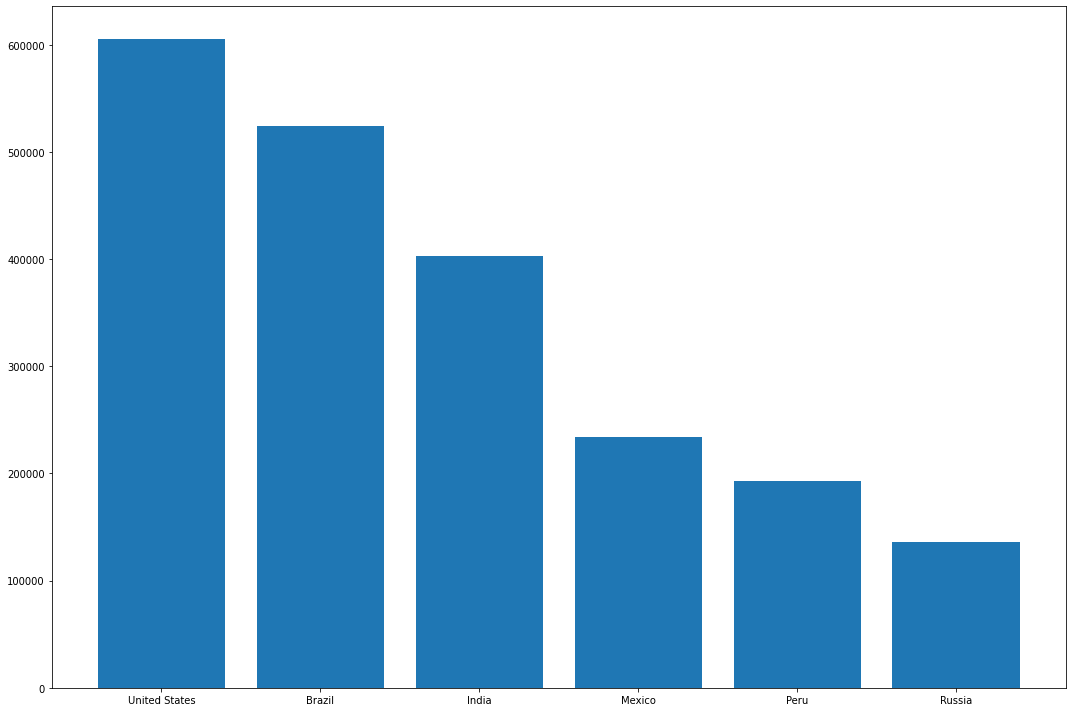

In [17]:
# gráfico de barras para total de mortes
top_5_total_deaths = df.loc[df.date == '2021-07-04', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

### Como o vírus está progredindo?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

In [18]:
# Criar uma cópia do DataFrame apenas com os 6 primeiros paises no total de mortes
df_brasil = df.loc[df.location == "Brazil"].copy()
df_eua = df.loc[df.location == "United States"].copy()
df_india = df.loc[df.location == "India"].copy()
df_mexico = df.loc[df.location == "Mexico"].copy()
df_peru = df.loc[df.location == "Peru"].copy()
df_russia = df.loc[df.location == "Russia"].copy()

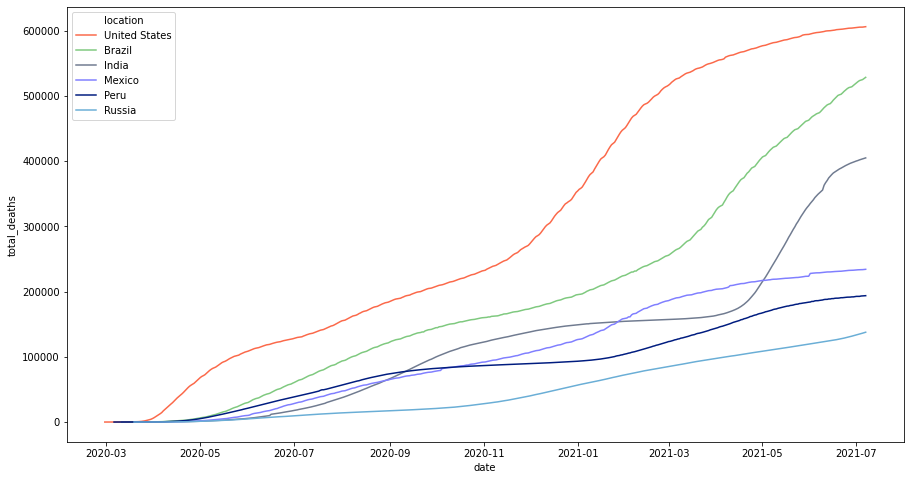

In [21]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'total_deaths',data = df_eua, hue="location", palette = 'Reds')
sns.lineplot(x = 'date', y = 'total_deaths',data = df_brasil, hue="location", palette = 'Accent')
sns.lineplot(x = 'date', y = 'total_deaths',data = df_india, hue="location" , palette = 'bone')
sns.lineplot(x = 'date', y = 'total_deaths',data = df_mexico, hue="location", palette ='cool')
sns.lineplot(x = 'date', y = 'total_deaths',data = df_peru, hue="location", palette = 'dark')
sns.lineplot(x = 'date', y = 'total_deaths',data = df_russia, hue="location", palette = 'Blues')

plt.show()

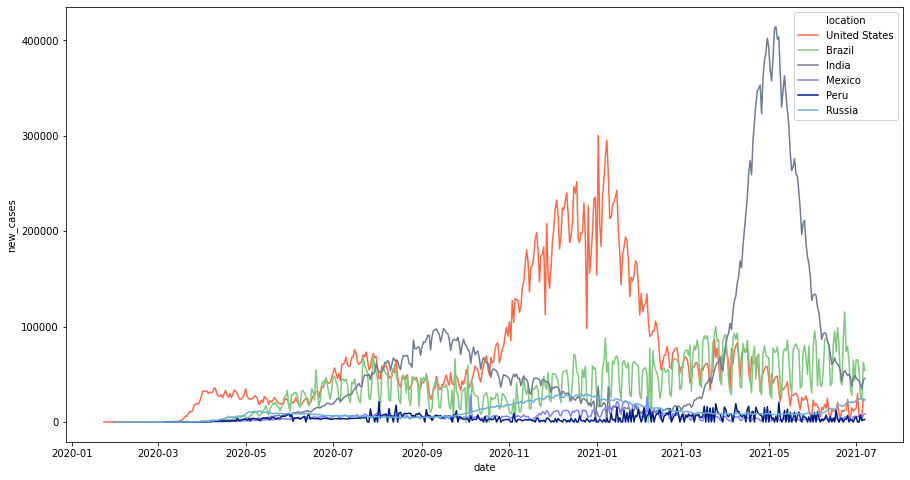

In [20]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'new_cases',data = df_eua, hue="location", palette = 'Reds')
sns.lineplot(x = 'date', y = 'new_cases',data = df_brasil, hue="location", palette = 'Accent')
sns.lineplot(x = 'date', y = 'new_cases',data = df_india, hue="location" , palette = 'bone')
sns.lineplot(x = 'date', y = 'new_cases',data = df_mexico, hue="location", palette ='cool')
sns.lineplot(x = 'date', y = 'new_cases',data = df_peru, hue="location", palette = 'dark')
sns.lineplot(x = 'date', y = 'new_cases',data = df_russia, hue="location", palette = 'Blues')

plt.show()

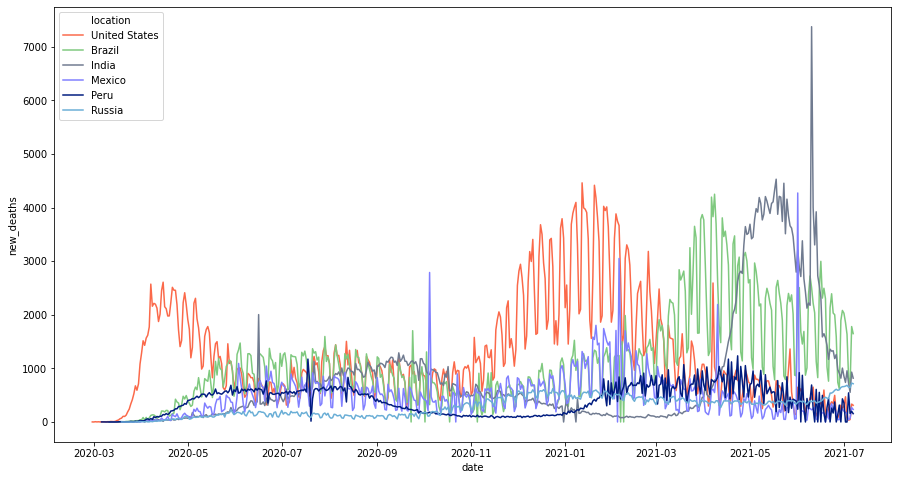

In [22]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'new_deaths',data = df_eua, hue="location", palette = 'Reds')
sns.lineplot(x = 'date', y = 'new_deaths',data = df_brasil, hue="location", palette = 'Accent')
sns.lineplot(x = 'date', y = 'new_deaths',data = df_india, hue="location" , palette = 'bone')
sns.lineplot(x = 'date', y = 'new_deaths',data = df_mexico, hue="location", palette ='cool')
sns.lineplot(x = 'date', y = 'new_deaths',data = df_peru, hue="location", palette = 'dark')
sns.lineplot(x = 'date', y = 'new_deaths',data = df_russia, hue="location", palette = 'Blues')

plt.show()

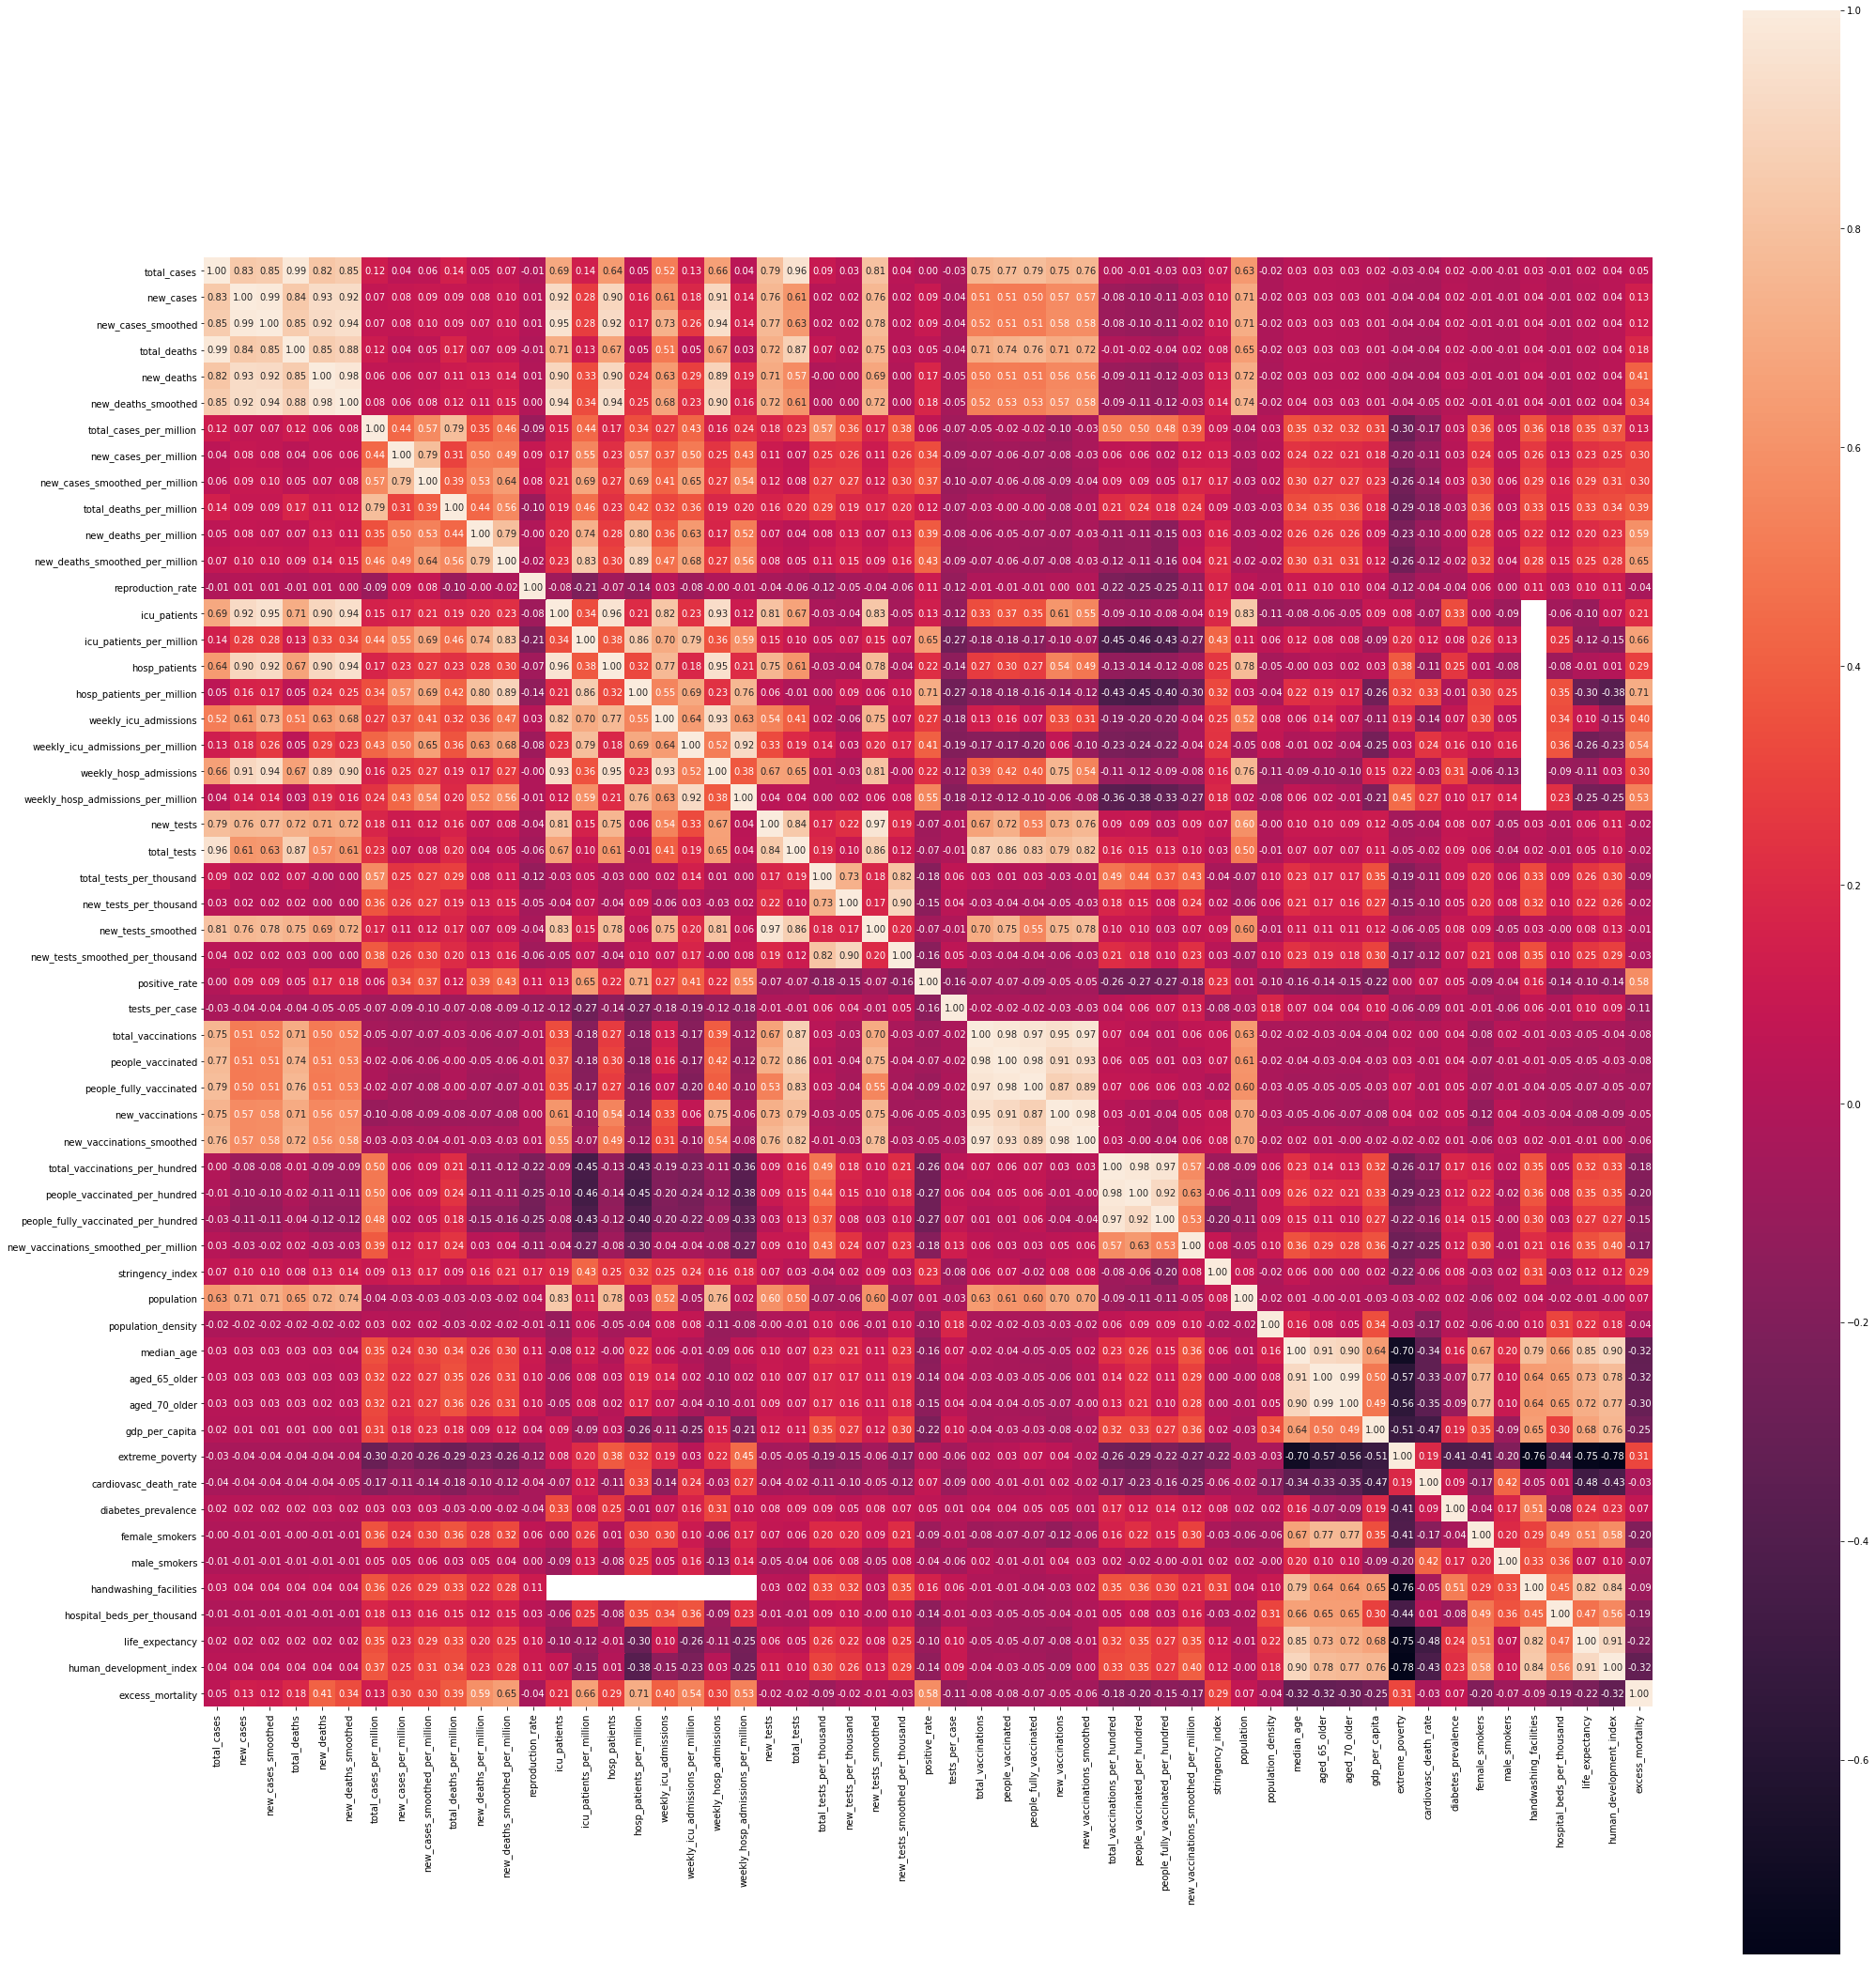

In [23]:
# mapa de correlaçao

# criando a matriz de correlação
corr = df.corr()

# plotando o heatmap
f, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=True);
plt.tight_layout()

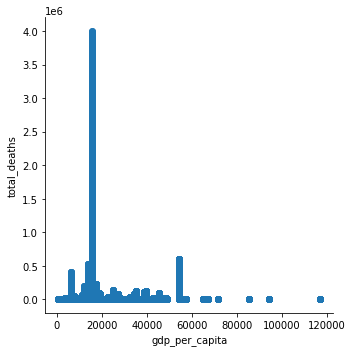

In [24]:
# plot com seaborn
sns.lmplot(x='gdp_per_capita', y='total_deaths', data=df,
           fit_reg=False)
# modificando com matplotlib

plt.tight_layout()

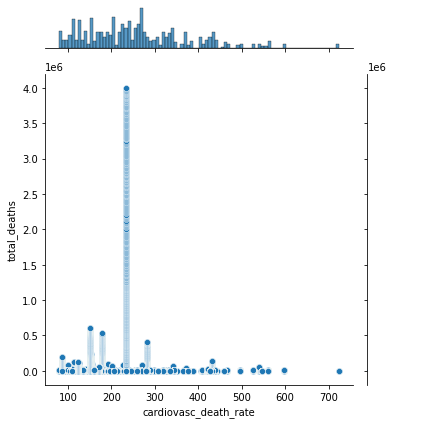

In [25]:
sns.jointplot(x=df['cardiovasc_death_rate'], y=df['total_deaths']);

plt.tight_layout()

In [26]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.718000e+04,97177.000000,96167.000000,8.700600e+04,87162.000000,96167.000000,96663.000000,96660.000000,95655.000000,86502.000000,86658.000000,95655.000000,81116.000000,10118.000000,10118.000000,12568.000000,12568.000000,884.000000,884.000000,1569.000000,1569.000000,4.515900e+04,4.483000e+04,44830.000000,45159.000000,5.255200e+04,52552.000000,49099.000000,48501.000000,1.726900e+04,1.643300e+04,1.360600e+04,1.438900e+04,3.013200e+04,17269.00000,16433.000000,13606.000000,30132.000000,84675.000000,1.002620e+05,93745.000000,90123.000000,89111.000000,89625.000000,90478.000000,61037.000000,90492.000000,92840.000000,70767.000000,69734.000000,45467.000000,82419.000000,95836.000000,90630.000000,3571.000000
mean,1.082582e+06,6034.405415,6056.703528,2.917006e+04,146.087217,131.634006,13394.240456,76.133049,76.391613,295.153254,1.549305,1.396220,1.003397,1055.087369,26.141600,4586.633593,167.584849,272.981356,20.485837,3515.235254,107.908756,4.835323e+04,7.937330e+06,319.190966,2.141979,4.587700e+04,2.054146,0.088427,164.675163,3.314541e+07,1.837382e+07,1.019517e+07,6.907698e+05,3.314538e+05,25.25815,16.459057,10.454996,3289.664675,58.219827,1.243922e+08,387.133888,30.558847,8.787252,5.562768,19282.429638,13.413818,258.539967,7.932413,10.566960,32.698619,50.825399,3.027246,73.239023,0.727282,18.251563
std,7.400162e+06,37701.131322,37436.410603,1.740365e+05,799.470927,743.225021,24508.370081,200.128056,158.583615,531.743366,3.956672,3.032085,0.351770,2871.764994,27.006434,11792.304612,209.620403,566.882115,35.787216,10762.542932,214.171940,1.770781e+05,3.450164e+07,752.173791,5.982725,1.615343e+05,5.086158,0.097145,889.713090,1.777445e+08,9.950962e+07,5.001629e+07,3.255925e+06,2.202509e+06,31.93719,18.994884,14.328432,4555.108689,21.012219,6.789103e+08,1803.498809,9.130750,6.210003,4.236243,19998.908900,19.963245,119.051055,4.153702,10.466185,13.486853,31.758895,2.458344,7.557516,0.150352,35.848993
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.306000e+03,2.000000,7.571000,5.500000e+01,0.000000,0.000000,264.548000,0.216000,1.301000,8.050000,0.000000,0.000000,0.840000,32.000000,4.793000,118.000000,23.436250,10.747000,1.677000,50.000000,9.351000,1.672500e+03,1.645135e+05,14.554250,0.145000,1.751000e+03,0.144000,0.016000,7.700000,1.276080e+05,9.913300e+04,5.205625e+04,4.656000e+03,8.690000e+02,

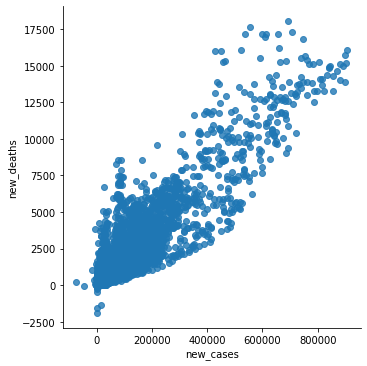

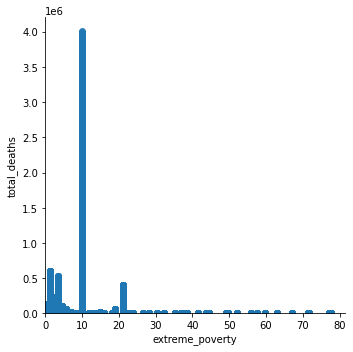

In [27]:
# plot com seaborn
sns.lmplot(x='new_cases', y='new_deaths', data=df,
           fit_reg=False)

sns.lmplot(x='extreme_poverty', y='total_deaths', data=df,
            fit_reg=False)
 
# modificando com matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.tight_layout()

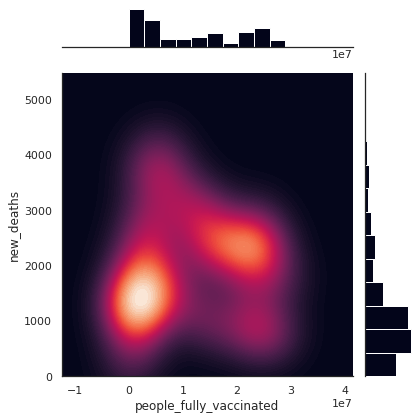

In [28]:
#@title Smooth kernel density with marginal histograms no Brasil

import seaborn as sns
sns.set_theme(style="white")

g = sns.JointGrid(data=df_brasil, x="people_fully_vaccinated", y="new_deaths", space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=10);
# modificando com matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.tight_layout()

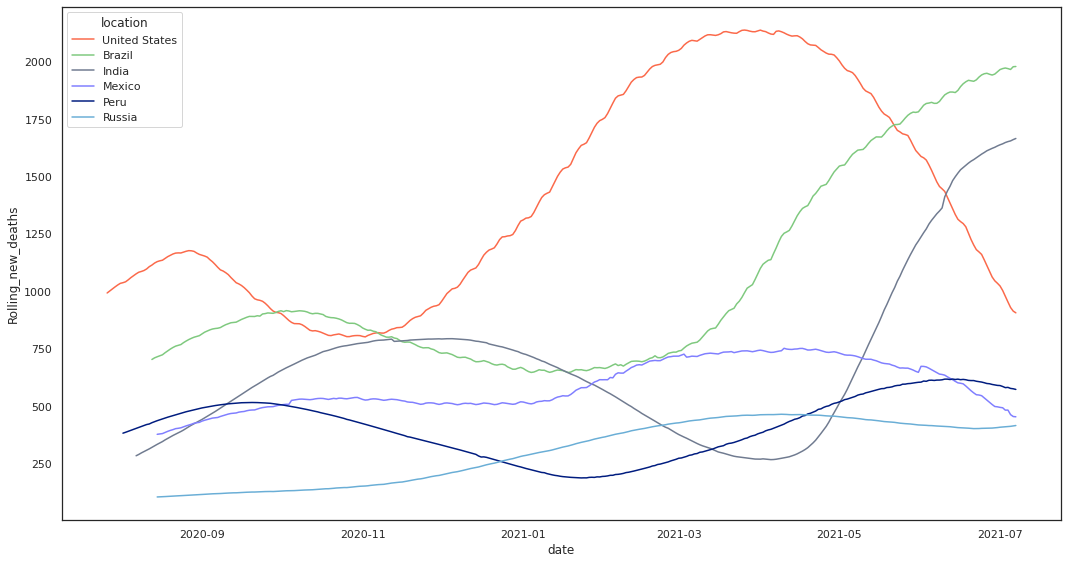

In [31]:
df_brasil['Rolling_new_deaths'] = df_brasil['new_deaths'].rolling(150).mean()
df_eua['Rolling_new_deaths'] = df_eua['new_deaths'].rolling(150).mean()
df_mexico['Rolling_new_deaths'] = df_mexico['new_deaths'].rolling(150).mean()
df_russia['Rolling_new_deaths'] = df_russia['new_deaths'].rolling(150).mean()
df_india['Rolling_new_deaths'] = df_india['new_deaths'].rolling(150).mean()
df_peru['Rolling_new_deaths'] = df_peru['new_deaths'].rolling(150).mean()
plt.figure(figsize = (15,8))

sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_eua, hue="location", palette = 'Reds')
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_brasil, hue="location", palette = 'Accent')
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_india, hue="location" , palette = 'bone')
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_mexico, hue="location", palette ='cool')
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_peru, hue="location", palette = 'dark')
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_russia, hue="location", palette = 'Blues')
plt.tight_layout()
plt.show()

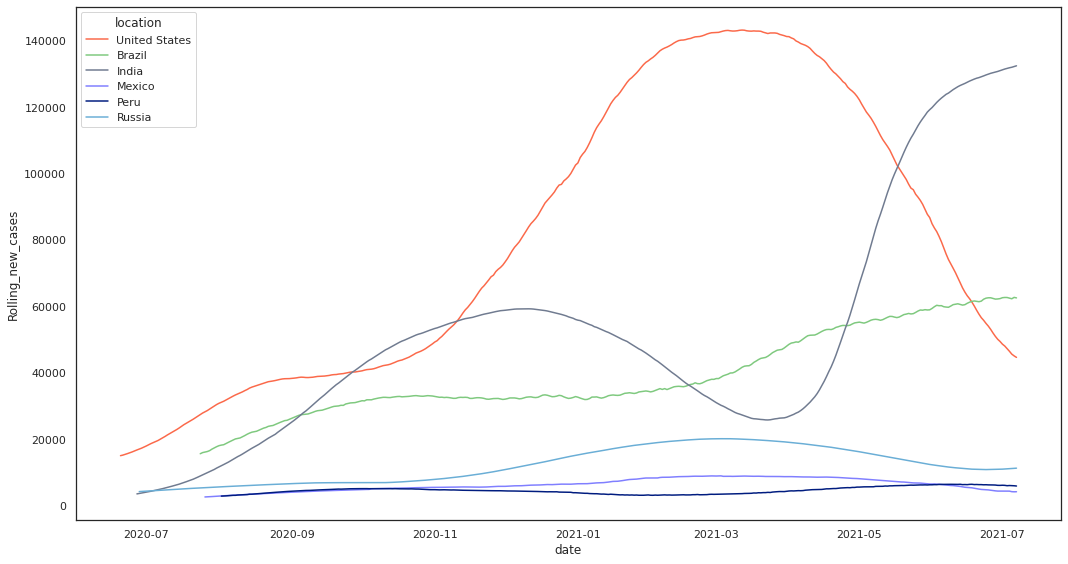

In [48]:
df_brasil['Rolling_new_cases'] = df_brasil['new_cases'].rolling(150).mean()
df_eua['Rolling_new_cases'] = df_eua['new_cases'].rolling(150).mean()
df_mexico['Rolling_new_cases'] = df_mexico['new_cases'].rolling(150).mean()
df_russia['Rolling_new_cases'] = df_russia['new_cases'].rolling(150).mean()
df_india['Rolling_new_cases'] = df_india['new_cases'].rolling(150).mean()
df_peru['Rolling_new_cases'] = df_peru['new_cases'].rolling(150).mean()
plt.figure(figsize = (15,8))

sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_eua, hue="location", palette = 'Reds')
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_brasil, hue="location", palette = 'Accent')
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_india, hue="location" , palette = 'bone')
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_mexico, hue="location", palette ='cool')
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_peru, hue="location", palette = 'dark')
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_russia, hue="location", palette = 'Blues')
plt.tight_layout()
plt.show()

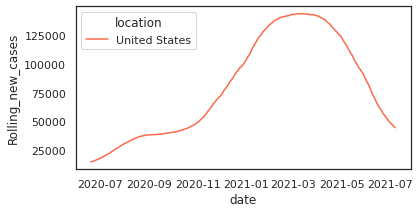

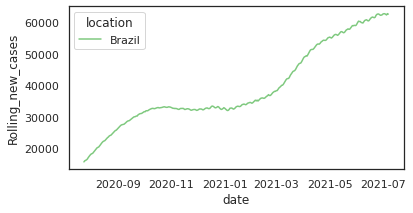

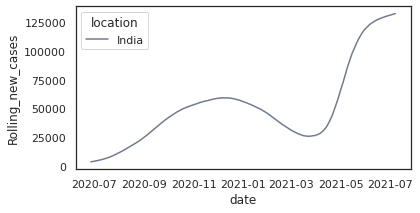

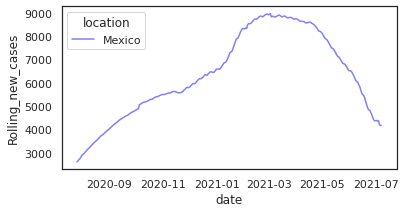

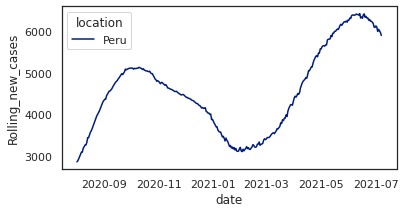

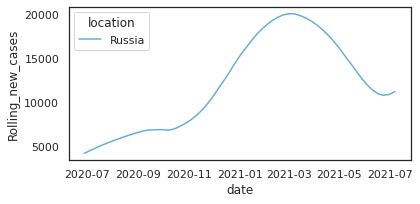

In [39]:
df_brasil['Rolling_new_cases'] = df_brasil['new_cases'].rolling(150).mean()
df_eua['Rolling_new_cases'] = df_eua['new_cases'].rolling(150).mean()
df_mexico['Rolling_new_cases'] = df_mexico['new_cases'].rolling(150).mean()
df_russia['Rolling_new_cases'] = df_russia['new_cases'].rolling(150).mean()
df_india['Rolling_new_cases'] = df_india['new_cases'].rolling(150).mean()
df_peru['Rolling_new_cases'] = df_peru['new_cases'].rolling(150).mean()
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_eua, hue="location", palette = 'Reds')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_brasil, hue="location", palette = 'Accent')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_india, hue="location" , palette = 'bone')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_mexico, hue="location", palette ='cool')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_peru, hue="location", palette = 'dark')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_cases',data = df_russia, hue="location", palette = 'Blues')
plt.tight_layout()


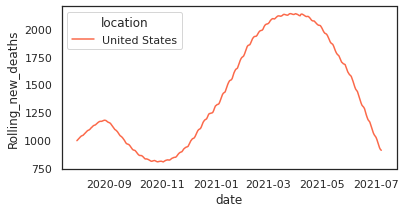

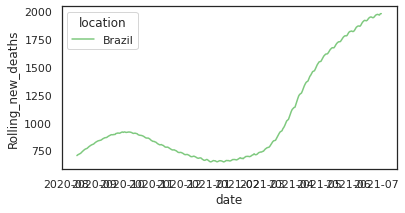

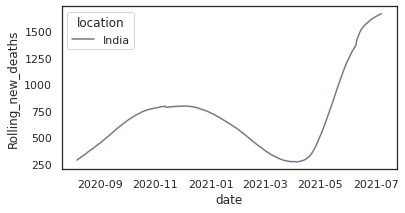

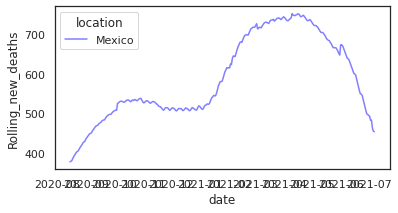

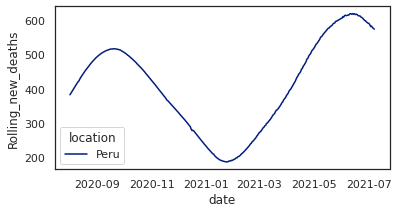

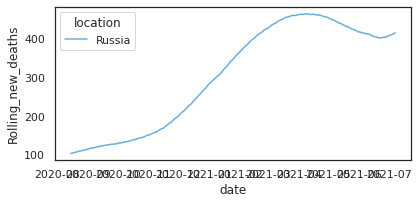

In [33]:
df_brasil['Rolling_new_deaths'] = df_brasil['new_deaths'].rolling(150).mean()
df_eua['Rolling_new_deaths'] = df_eua['new_deaths'].rolling(150).mean()
df_mexico['Rolling_new_deaths'] = df_mexico['new_deaths'].rolling(150).mean()
df_russia['Rolling_new_deaths'] = df_russia['new_deaths'].rolling(150).mean()
df_india['Rolling_new_deaths'] = df_india['new_deaths'].rolling(150).mean()
df_peru['Rolling_new_deaths'] = df_peru['new_deaths'].rolling(150).mean()
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_eua, hue="location", palette = 'Reds')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_brasil, hue="location", palette = 'Accent')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_india, hue="location" , palette = 'bone')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_mexico, hue="location", palette ='cool')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_peru, hue="location", palette = 'dark')
plt.figure(figsize = (6,3))
sns.lineplot(x = 'date', y = 'Rolling_new_deaths',data = df_russia, hue="location", palette = 'Blues')

plt.tight_layout()